

```
# This is formatted as code
```

# Importing libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Loading the Boston Housing dataset using pandas**

In [33]:


# read the data from the file into a DataFrame
df = pd.read_csv('housing.data', header=None, delim_whitespace=True)




Rename the columns of the dataset 

In [34]:
# add column names to the DataFrame
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
              'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# print the first 5 rows of the DataFrame to verify that it was read correctly
#print(df.head())


**Split the dataset into a training set and a test set**
80% of the data for training and the remaining 20% for testing

In [35]:
from sklearn.model_selection import train_test_split

# Load the data into a Pandas dataframe
df = pd.read_csv('housing.data', delim_whitespace=True, header=None)

# Set the column names
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Define the features and target variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Implement linear regression using gradient descent to predict the MEDV



1.   *A function to calculate the cost function.*
2.   *A function to perform gradient descent.*
3.   *A function to predict the MEDV given a set of input features.* 




In [36]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias to zeros
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Perform gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

**Train your linear regression model on the training set**

*test set using the mean squared error (MSE) metric.*

In [ ]:
# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)
# Evaluate the model using the mean squared error (MSE)
mse = lr.mse(y_test, y_pred)
print('Mean Squared Error:', mse)


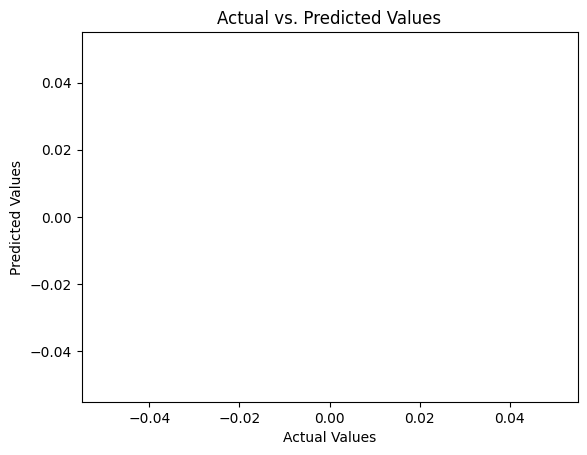

In [39]:
# Plot the predicted values vs. the actual values on the test set in a scatter plot.
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

#Logistic Regression

**load the data into a Pandas DataFrame**

In [42]:


# read the data from the file into a DataFrame
df = pd.read_csv('housing.data', header=None, delim_whitespace=True)



**Binarize the MEDV column by setting a threshold value**

In [43]:
threshold = df[13].median()
df['target'] = (df[13] >= threshold).astype(int)


**Split the dataset into training and test sets**

In [44]:
from sklearn.model_selection import train_test_split

X = df.drop([13, 'target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Define the logistic regression model and the cost function**

In [45]:

class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_proba(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)


**Train the logistic regression model on the training set and evaluate its performance on the test set**

In [46]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = (y_pred == y_test).mean()
print('Accuracy:', accuracy)


<ipython-input-45-0ad3923c0498>:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy: 0.7156862745098039


**Plot the decision boundary of the logistic regression model**

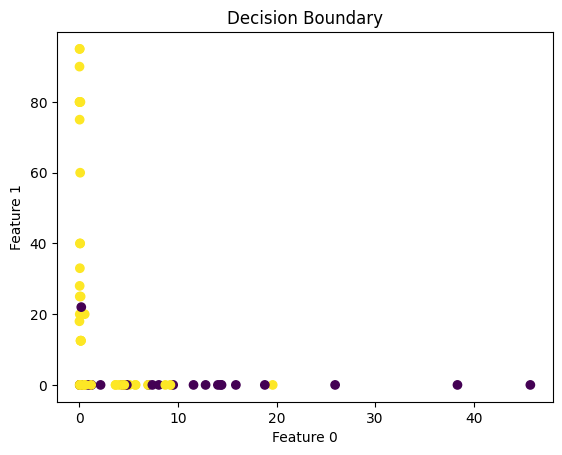

In [47]:
import matplotlib.pyplot as plt

plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Decision Boundary')
plt.show()
